In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#测试样本的数量
parameter=500

data=pd.DataFrame(index=range(0,parameter),columns=('probability','label'))
data['label']=np.random.randint(0,2,size=len(data))
data['probability']=np.random.choice(np.arange(0.1,1,0.1),len(data['probability']))
data.head()

,probability,label
0,0.5,0
1,0.6,1
2,0.8,0
3,0.2,0
4,0.6,1


In [3]:
cm=np.arange(4).reshape(2,2)
cm[0,0]=len(data[data['label']==0][data['probability']<0.5]) #TN
cm[0,1]=len(data[data['label']==0][data['probability']>=0.5])#FP
cm[1,0]=len(data[data['label']==1][data['probability']<0.5]) #FN
cm[1,1]=len(data[data['label']==1][data['probability']>=0.5])#TP

C:\Users\Zhao\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Zhao\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Zhao\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Zhao\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


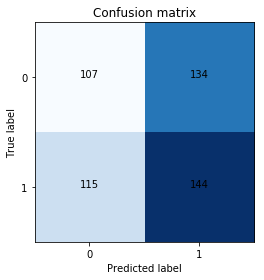

In [4]:
import itertools
classes = [0,1]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes, rotation=0)
for i, j in  itertools.product(range(cm.shape[0]), range(cm.shape[1])):    
    plt.text(j, i, cm[i, j],horizontalalignment="center")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
data.sort_values('probability',inplace=True,ascending=False)

In [6]:
len(data[data['label']==0]),len(data[data['label']==1])

(241, 259)

In [7]:
TPRandFPR=pd.DataFrame(index=range(len(data)),columns=('TPR','FPR'))
for j in range(len(data)):
    data1=data.head(n=j+1)
    FPR=len(data1[data1['label']==0][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['label']==0]))
    TPR=len(data1[data1['label']==1][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['label']==1]))
    TPRandFPR.iloc[j]=[TPR,FPR]


C:\Users\Zhao\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Zhao\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [8]:
TPRandFPR.head()

,TPR,FPR
0,0,0.00414938
1,0,0.00829876
2,0,0.0124481
3,0.003861,0.0124481
4,0.00772201,0.0124481


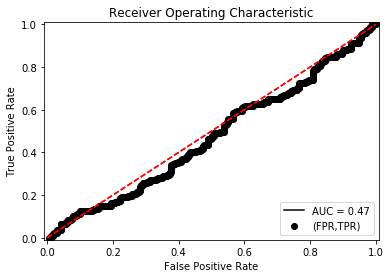

In [9]:
from sklearn.metrics import auc
AUC= auc(TPRandFPR['FPR'],TPRandFPR['TPR'])
plt.scatter(x=TPRandFPR['FPR'],y=TPRandFPR['TPR'],label='(FPR,TPR)',color='k')
plt.plot(TPRandFPR['FPR'], TPRandFPR['TPR'], 'k',label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([(0,0),(1,1)],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,01.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
